In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

# Generating Data

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [ ]:
np.random.seed(0)

In [ ]:
data, labels = make_blobs(n_samples =1000,centers =4,n_features =2, random_state = 0)

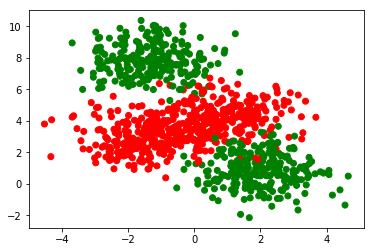

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

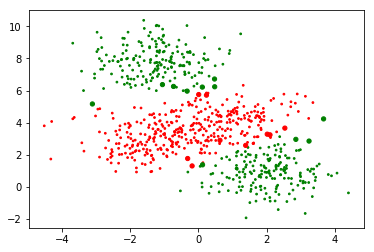

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_pred_binarised_train, cmap = my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In [ ]:
labels_origin = labels
labels = np.mod(labels_origin,2)

# Feed Forward Neural Network

In [ ]:
class FFnetwork:
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
 
    
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.h1 = self.sigmoid(self.w1*self.x1 + self.w2*self.x2 + self.b1)
    self.h2 = self.sigmoid(self.w3*self.x1 + self.w4*self.x2 + self.b2)
    self.h3 = self.sigmoid(self.w5*self.h1 + self.w6*self.h2 + self.b3)
    self.h4 = self.sigmoid(self.w7*self.h1 + self.w8*self.h2 + self.b4)
    self.h5 = self.sigmoid(self.w9*self.h3 + self.w10*self.h4 + self.b5)
    return self.h5
  
  def grad_cal(self,x,y):
    self.forward_pass(x)
    
    self.da5 = (self.h5 - y)
    
    self.dw9 = self.da5 * self.h3
    self.dw10 = self.da5 * self.h4
    self.db5 = self.da5
    
    self.dh3 = self.da5*self.h3
    self.da3 = self.dh3*self.h3*(1-self.h3)
    self.dh4 = self.da5*self.h4
    self.da4 = self.dh4*self.h4*(1-self.h4)
    self.db3 = self.da3
    self.db4 = self.da4
    
    
    self.dw5 = self.da3*self.h1
    self.dw6 = self.da3*self.h2
    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    
    self.dh1 = self.da3*self.w5 + self.da4*self.w7
    self.dh2 = self.da3*self.w6 + self.da4*self.w8
    self.da1 = self.dh1*self.h1*(1-self.h1)
    self.da2 = self.dh2*self.h2*(1-self.h2)
    self.db1 = self.da1
    self.db2 = self.da2
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    
  def predict(self, X):  
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
    
  def fit(self,X,Y, epochs =1000, learning_rate = 5, display_loss = False):
      
      if display_loss:
        loss = {}
      
      for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
        
        dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, db1, db2, db3, db4, db5 = [0]*15
        for x, y in zip(X, Y):
          self.grad_cal(x, y)
          dw1 += self.dw1
          dw2 += self.dw2
          dw3 += self.dw3
          dw4 += self.dw4
          dw5 += self.dw5
          dw6 += self.dw6
          dw7 += self.dw7
          dw8 += self.dw8
          dw9 += self.dw9
          dw10 += self.dw10
          db1 += self.db1
          db2 += self.db2
          db3 += self.db3
          db4 += self.db4
          db5 += self.db5
        
        m = X.shape[0]
        self.w1 -= learning_rate * dw1 / m
        self.w2 -= learning_rate * dw2 / m
        self.w3 -= learning_rate * dw3 / m
        self.w4 -= learning_rate * dw4 / m
        self.w5 -= learning_rate * dw5 / m
        self.w6 -= learning_rate * dw6 / m
        self.w7 -= learning_rate * dw7 / m
        self.w8 -= learning_rate * dw8 / m
        self.w9 -= learning_rate * dw9 / m
        self.w10 -= learning_rate * dw10 / m
        
        self.b1 -= learning_rate * db1 / m
        self.b2 -= learning_rate * db2 / m
        self.b3 -= learning_rate * db3 / m
        self.b4 -= learning_rate * db4 / m
        self.b5 -= learning_rate * db5 / m
      
        if display_loss:
          Y_pred = self.predict(X)
          loss[i] = mean_squared_error(Y_pred, Y)
 
      if display_loss:
        plt.plot(loss.values())
        plt.xlabel('Epochs')
        plt.ylabel('Mea') 
        plt.show()
      
        
    

    
    

Splitting data into train and test set

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


Model Training

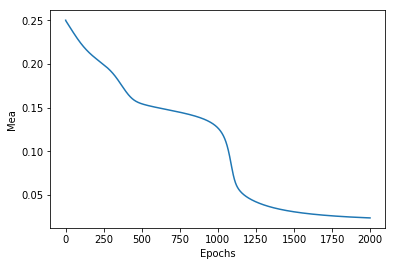

In [ ]:
ffnn = FFnetwork()
ffnn.fit(X_train,Y_train,2000,1,True)

In [ ]:
Y_pred_train = ffnn.predict(X_train)
Y_pred_val = ffnn.predict(X_val)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

Model Evaluation

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)


In [ ]:
print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.94
